In [3]:
from __future__ import division

import time
import gzip

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap("gray")
plt.rcParams["image.interpolation"] = None

In [4]:
import TN_utils
reload(TN_utils)

<module 'TN_utils' from 'TN_utils.pyc'>

In [5]:
feature_vec_36 = TN_utils.load_featureImg_r(1)
feature_vec_12 = TN_utils.load_featureImg_r(12)
print feature_vec_36.shape

(65536, 60, 2)


In [6]:
with gzip.open("../data/toytreerot_imgGT.npy.gz", "r") as f:
    GT_vec_array = np.load(f)
GT_vec_36 = GT_vec_array[0]
GT_vec_12 = GT_vec_array[11]

In [7]:
with gzip.open("../data/toytreerot_mask.npy.gz", "r") as f:
    mask_vec_array = np.load(f)
mask_vec_36 = mask_vec_array[0]
mask_vec_12 = mask_vec_array[11]

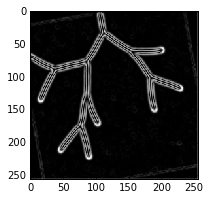

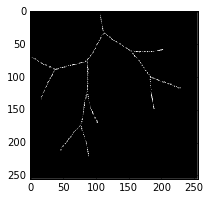

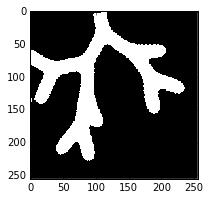

In [8]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_36, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_36, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_36.reshape((256, 256)))

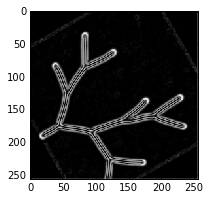

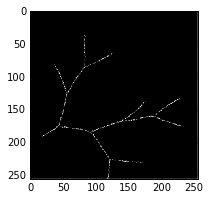

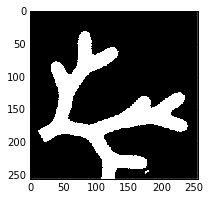

In [9]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_12, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_12, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_12.reshape((256, 256)))

In [10]:
m_feature_vec36 = feature_vec_36[mask_vec_36][:, 12:24]
m_GT_vec36 = GT_vec_36[mask_vec_36]
print m_feature_vec36.shape, m_GT_vec36.shape

(13857, 12, 2) (13857, 2)


In [11]:
m_feature_vec12 = feature_vec_12[mask_vec_12][:, 12:24]
m_GT_vec12 = GT_vec_12[mask_vec_12]
print m_feature_vec12.shape, m_GT_vec12.shape

(13597, 12, 2) (13597, 2)


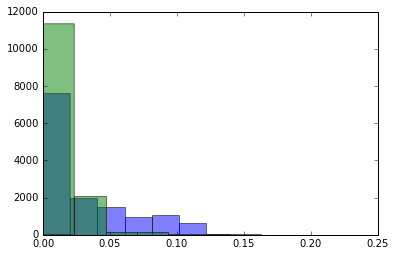

In [12]:
# V 正規化されてない
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [13]:
normed_m_feature_vec36, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec36)

In [14]:
normed_m_feature_vec12, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec12)

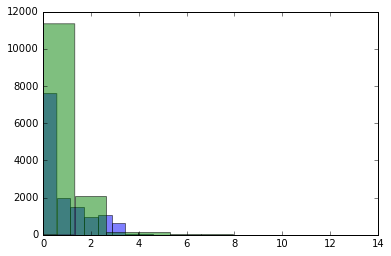

In [15]:
# V まあまあされてる
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [16]:
import TNN
reload(TNN)

Couldn't import dot_parser, loading of dot files will not be possible.


<module 'TNN' from 'TNN.pyc'>

In [17]:
n_hidden = 100
result = TNN.ab(normed_m_feature_vec36, m_GT_vec36,
                normed_m_feature_vec12, m_GT_vec12,
                n_hidden=n_hidden, h_activation="ReLU", out_activation="ReLU")

In [18]:
f_train, f_training_error, f_test_error, f_output, s_input, s_target, param2_list, a_list, b_list, bias_list = result

In [19]:
n_tensor = 12
param2_list[0].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[1].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[2].set_value(0.)
for i in range(n_hidden):
    a_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    b_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    bias_list[i].set_value(0.)

In [20]:
lr = 0.5 
reg2 = 0.
batch_size = 100
n_batchs = s_input.get_value(borrow=True).shape[0] // batch_size

n_epochs = 200
interval = 10
training_error_array = np.zeros((n_epochs // interval,))
test_error_array = np.zeros((n_epochs // interval,))

In [21]:
for i_epoch in xrange(n_epochs):
    for i_batch in xrange(n_batchs):
        f_train(i_batch, lr, reg2, batch_size)
    
    if i_epoch == 50:
        batch_size = 1000

    if i_epoch % interval == 0:
        training_error = f_training_error()[0]
        training_error_array[i_epoch // interval] = training_error
        test_error = f_test_error()[0]
        test_error_array[i_epoch // interval] = test_error
        print i_epoch, training_error, test_error

0 0.00790242468689 0.00784262270856
10 0.00531118331384 0.00523725708935
20 0.00393349105807 0.00384262720984
30 0.00371247479533 0.00360824196567
40 0.00390363659786 0.00379274199904
50 0.00410085608164 0.0039864196879
60 0.00372761978193 0.00361549375107
70 0.00358945506623 0.00347937407267
80 0.00352911546821 0.0034208240126
90 0.00349981356641 0.00339308032957
100 0.00348489765836 0.00337945058768
110 0.0034774472552 0.00337310418026
120 0.00347424481992 0.00337081736266
130 0.00347363758711 0.00337103586057
140 0.00347466991316 0.00337286511759
150 0.00347663888819 0.00337578324811
160 0.00347943311868 0.00337948046677
170 0.00348283525734 0.00338373977762
180 0.00348668874711 0.00338840547667
190 0.00349088090887 0.00339337676328


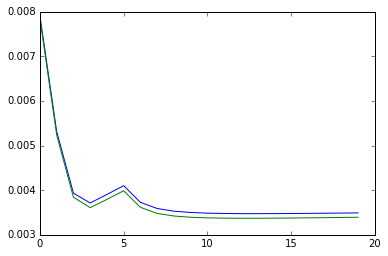

In [22]:
# V
plt.plot(training_error_array)
plt.plot(test_error_array)

In [23]:
import os
if not os.path.isdir("../results/RCNabnh100_toytree12"):
    os.makedirs("../results/RCNabnh100_toytree12")

with open("../results/RCNabnh100_toytree12/training_error_array.npy", "w") as f:
    np.save(f, training_error_array)
with open("../results/RCNabnh100_toytree12/test_error_array.npy", "w") as f:
    np.save(f, test_error_array)
gt2_vec = f_output(feature_vec_36[:, 12:24]/norm_coef[:, np.newaxis])[0]
gt1_img = TN_utils.convert_gt2vec_to_gt1img(gt2_vec, img_shape=(256, 256))
sio.savemat('../results/RCNabnh100_toytree12/v_train.mat', {'v_train': gt1_img})

feature_vec_12 = TN_utils.load_featureImg_r(12)[:, 12:24]
gt2_vec_12 = f_output(feature_vec_12/norm_coef[:, np.newaxis])[0]
gt1_img_12 = TN_utils.convert_gt2vec_to_gt1img(gt2_vec_12, img_shape=(256, 256))
sio.savemat('../results/RCNabnh100_toytree12/v_test.mat', {'v_test': gt1_img_12})

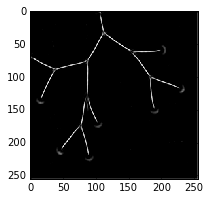

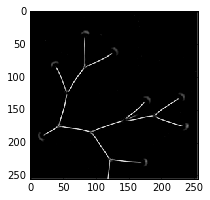

In [24]:
# V
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img, axis=0).T)

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img_12, axis=0).T)

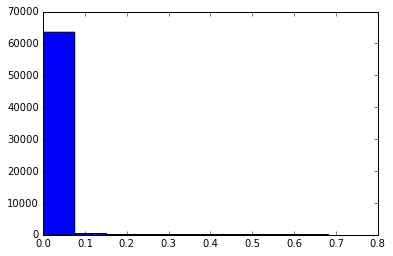

In [23]:
# V
gomi = plt.hist(np.linalg.norm(gt1_img, axis=0).flatten())